<a href="https://colab.research.google.com/github/Paaaark/Kaggle/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
!git clone /content/drive/MyDrive/Kaggle

fatal: repository '/content/drive/MyDrive/Kaggle' does not exist


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


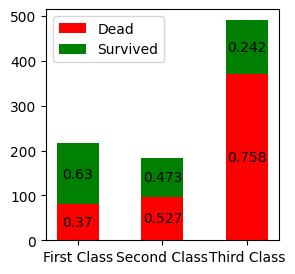

In [ ]:
p_class = {
    'Dead': [0, 0, 0],
    'Survived': [0, 0, 0],
    'Total': [0, 0, 0]
}
for ind in df.index:
  p_class['Survived' if df['Survived'][ind] else 'Dead'][df['Pclass'][ind] - 1] += 1
  p_class['Total'][df['Pclass'][ind] - 1] += 1
x_axis = ['First Class', 'Second Class', 'Third Class']
fig, ax = plt.subplots(figsize=(3,3))
bar1 = plt.bar(x_axis, p_class['Dead'], color='red', width=0.5)
bar2 = plt.bar(x_axis, p_class['Survived'], bottom=p_class['Dead'], color='green', width=0.5)
ax.bar_label(bar1, [round(i / j, 3) for i, j in zip(p_class['Dead'], p_class['Total'])], label_type='center')
ax.bar_label(bar2, [round(i / j, 3) for i, j in zip(p_class['Survived'], p_class['Total'])], label_type='center')
plt.legend((bar1[0], bar2[0]), ('Dead', 'Survived'))
plt.show()

In [ ]:
# Fill nan values with 0
for key in df.keys():
  df[key] = df[key].fillna(0)

survival_rate = {}
for key in df.keys():
  if key in ['PassengerId', 'Survived', 'Name', 'Ticket', 'Fare', 'Cabin']:
    continue
  survival_rate[key] = {};
  for ind in df.index:
    if df[key][ind] in survival_rate[key]:
      survival_rate[key][df[key][ind]][df['Survived'][ind]] += 1
    else:
      survival_rate[key][df[key][ind]] = [0, 0]
      survival_rate[key][df[key][ind]][df['Survived'][ind]] += 1

print(survival_rate)

{'Pclass': {3: [372, 119], 1: [80, 136], 2: [97, 87]}, 'Sex': {'male': [468, 109], 'female': [81, 233]}, 'Age': {22.0: [16, 11], 38.0: [6, 5], 26.0: [12, 6], 35.0: [7, 11], 0.0: [125, 52], 54.0: [5, 3], 2.0: [7, 3], 27.0: [7, 11], 14.0: [3, 3], 4.0: [3, 7], 58.0: [2, 3], 20.0: [12, 3], 39.0: [9, 5], 55.0: [1, 1], 31.0: [9, 8], 34.0: [9, 6], 15.0: [1, 4], 28.0: [18, 7], 8.0: [2, 2], 19.0: [16, 9], 40.0: [7, 6], 66.0: [1, 0], 42.0: [7, 6], 21.0: [19, 5], 18.0: [17, 9], 3.0: [1, 5], 7.0: [2, 1], 49.0: [2, 4], 29.0: [12, 8], 65.0: [3, 0], 28.5: [2, 0], 5.0: [0, 4], 11.0: [3, 1], 45.0: [7, 5], 17.0: [7, 6], 32.0: [9, 9], 16.0: [11, 6], 25.0: [17, 6], 0.83: [0, 2], 30.0: [15, 10], 33.0: [9, 6], 23.0: [10, 5], 24.0: [15, 15], 46.0: [3, 0], 59.0: [2, 0], 71.0: [2, 0], 37.0: [5, 1], 47.0: [8, 1], 14.5: [1, 0], 70.5: [1, 0], 32.5: [1, 1], 12.0: [0, 1], 9.0: [6, 2], 36.5: [1, 0], 51.0: [5, 2], 55.5: [1, 0], 40.5: [2, 0], 44.0: [6, 3], 1.0: [2, 5], 61.0: [3, 0], 56.0: [2, 2], 50.0: [5, 5], 36.0: [

In [ ]:
#